<a href="https://colab.research.google.com/github/ShriyaGandotra/Intro-Machine-Learning/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/Machine Learning/Assignment 4')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

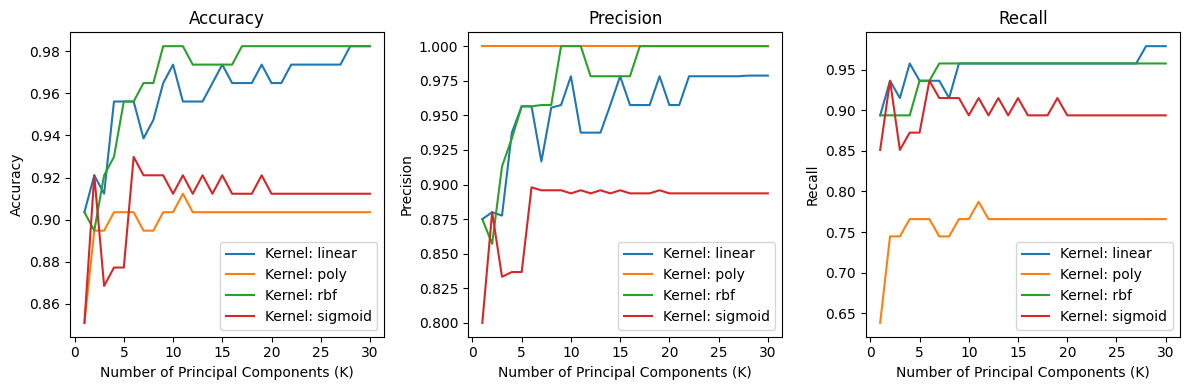



Best K for Accuracy: 9
Best Kernel for Accuracy: rbf
Accuracy: 0.9824561403508771




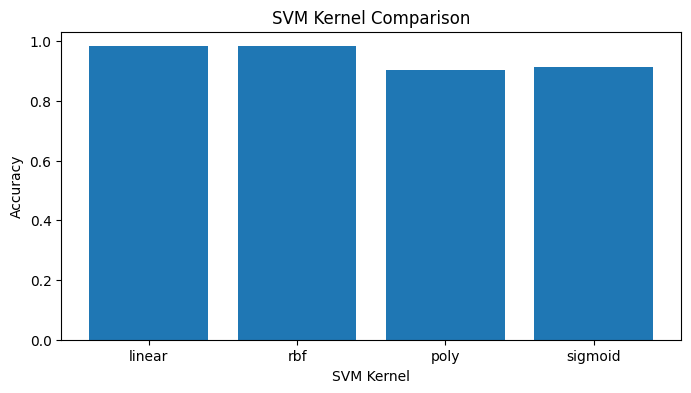

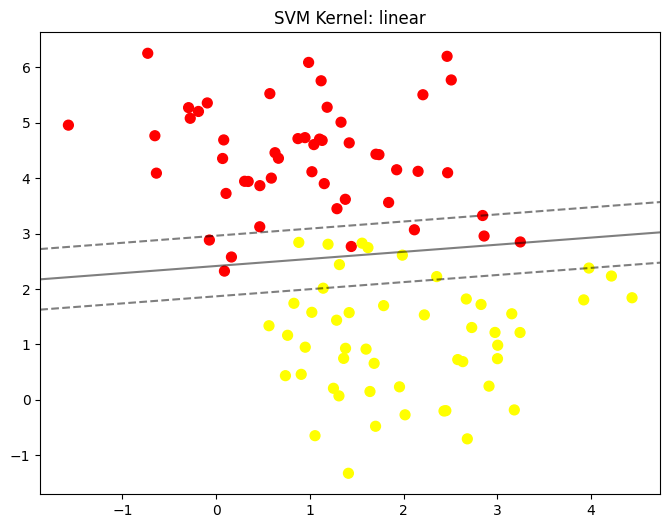

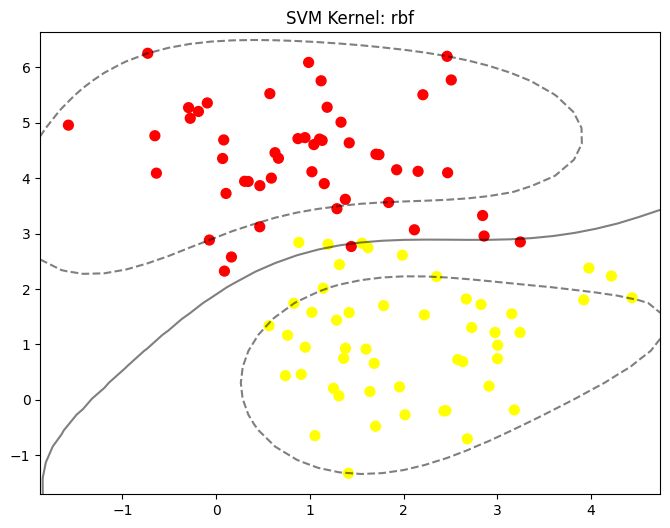

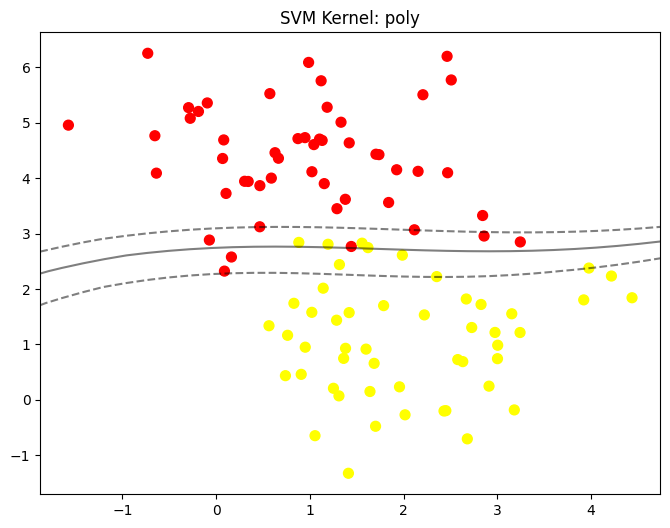

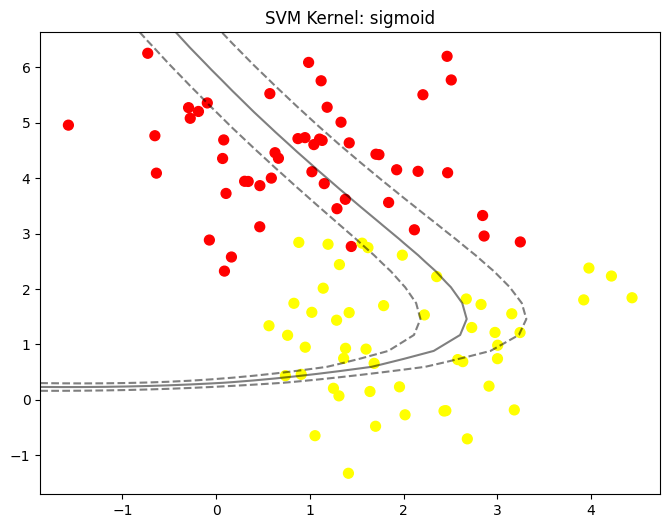

In [6]:
#---------------------------------- QUESTION 1 --------------------------------#
# Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign).
# Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

# A) Identify the optimum number of K, principal components that achieve the highest classification accuracy.

# Load the diabetes dataset (you may need to replace 'diabetes.csv' with the actual file path)
cancer_df = pd.read_csv('cancer.csv')

# List of variables to map
varlist =  ['diagnosis']

# Defining the map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

# Applying the function to the data
cancer_df[varlist] = cancer_df[varlist].apply(binary_map)

# Prepare the features (X) and target (Y)
Xc = cancer_df.iloc[: , 2:32]
Yc = cancer_df.iloc[: , 1]

# Split the data into training (80%) and test (20%) sets
Xc_train, Xc_test, Yc_train, Yc_test = train_test_split(Xc, Yc, test_size=0.2, random_state=0)

# Feature scaling and standardization
scaler = StandardScaler()
Xc_train = scaler.fit_transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

# Define a range of principal components (K)
K_range = range(1, 31)

# Lists to store accuracy, precision, and recall for each K and each kernel
accuracy_scores = []
precision_scores = []
recall_scores = []

# Loop through different values of K
for K in K_range:
    # Perform PCA with K components
    pca = PCA(n_components=K)
    Xc_train_pca = pca.fit_transform(Xc_train)
    Xc_test_pca = pca.transform(Xc_test)

    # Initialize SVM classifiers with different kernels
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']

    for kernel in kernels:
        clf = SVC(kernel=kernel)

        # Cross-validation to estimate the model's performance
        cv_scores = cross_val_score(clf, Xc_train_pca, Yc_train, cv=5)
        mean_cv_score = np.mean(cv_scores)

        # Train the SVM classifier
        clf.fit(Xc_train_pca, Yc_train)

        # Make predictions
        y_pred = clf.predict(Xc_test_pca)

        # Calculate accuracy, precision, and recall
        accuracy = accuracy_score(Yc_test, y_pred)
        precision = precision_score(Yc_test, y_pred)
        recall = recall_score(Yc_test, y_pred)

        accuracy_scores.append((K, kernel, accuracy))
        precision_scores.append((K, kernel, precision))
        recall_scores.append((K, kernel, recall))


# Find the best K and kernel based on accuracy
best_accuracy = max(accuracy_scores, key=lambda x: x[2])
best_K_acc, best_kernel_acc, best_accuracy_value = best_accuracy

# B) Plot your classification accuracy, precision, and recall over a different number of Ks.

# Plot the classification accuracy, precision, and recall over different K values
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title('Accuracy')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')
for kernel in kernels:
    kernel_scores = [score for score in accuracy_scores if score[1] == kernel]
    K_values = [score[0] for score in kernel_scores]
    acc_values = [score[2] for score in kernel_scores]
    plt.plot(K_values, acc_values, label=f'Kernel: {kernel}')
plt.legend()

plt.subplot(132)
plt.title('Precision')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Precision')
for kernel in kernels:
    kernel_scores = [score for score in precision_scores if score[1] == kernel]
    K_values = [score[0] for score in kernel_scores]
    precision_values = [score[2] for score in kernel_scores]
    plt.plot(K_values, precision_values, label=f'Kernel: {kernel}')
plt.legend()

plt.subplot(133)
plt.title('Recall')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Recall')
for kernel in kernels:
    kernel_scores = [score for score in recall_scores if score[1] == kernel]
    K_values = [score[0] for score in kernel_scores]
    recall_values = [score[2] for score in kernel_scores]
    plt.plot(K_values, recall_values, label=f'Kernel: {kernel}')
plt.legend()

plt.tight_layout()
plt.show()

# Print the best K and kernel based on accuracy
print("\n")
print(f"Best K for Accuracy: {best_K_acc}")
print(f"Best Kernel for Accuracy: {best_kernel_acc}")
print(f"Accuracy: {best_accuracy_value}")

# C) Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

kernel_types = ['linear', 'rbf', 'poly', 'sigmoid']

accuracies = []

for kernel in kernel_types:
    svm_classifier = SVC(kernel=kernel)
    svm_classifier.fit(Xc_train_pca, Yc_train)
    y_pred_svm = svm_classifier.predict(Xc_test_pca)
    accuracy_svm = accuracy_score(Yc_test, y_pred_svm)
    accuracies.append(accuracy_svm)

# Plot the results
print("\n")
plt.figure(figsize=(8, 4))
plt.bar(kernel_types, accuracies)
plt.xlabel('SVM Kernel')
plt.ylabel('Accuracy')
plt.title('SVM Kernel Comparison')
plt.show()

kernel_types = ['linear', 'rbf', 'poly', 'sigmoid']

Xc_train, Yc_train = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.0)

for k in kernel_types:
  clf = SVC(kernel=k).fit(Xc_train,Yc_train)
  print("\n")
  plt.figure(figsize=(8, 6))
  plt.scatter(Xc_train[:, 0], Xc_train[:, 1], c=Yc_train, s=50, cmap='autumn');
  plt.title(label=f'SVM Kernel: {k}')
  plot_svc_decision_function(clf, plot_support=False);



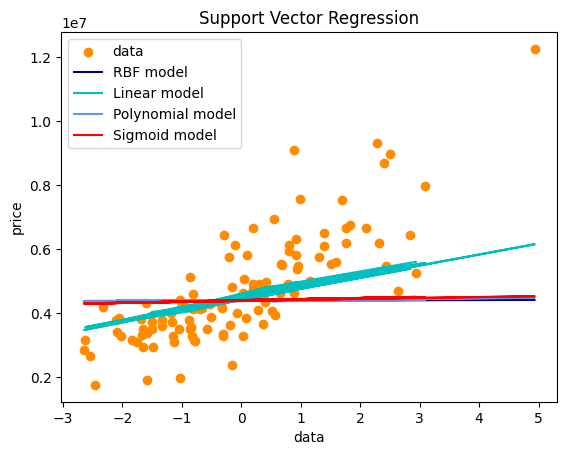

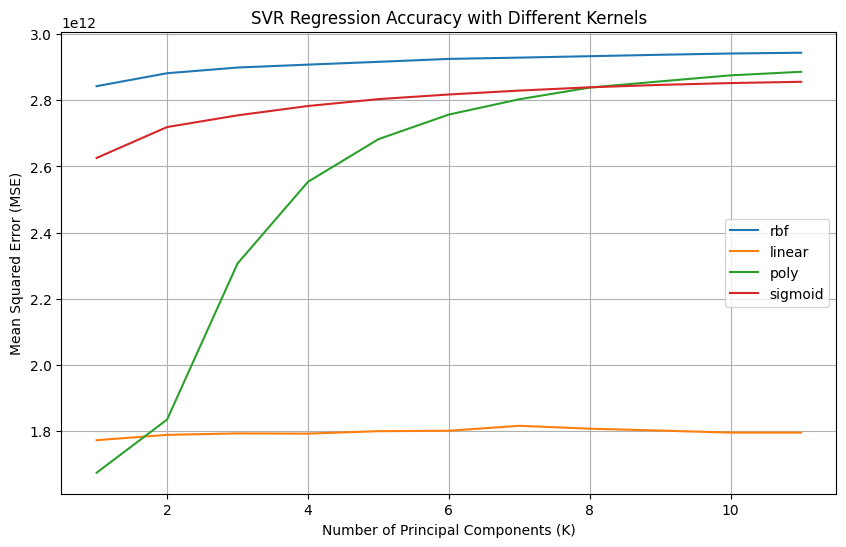



Best K: 1
Best Kernel: poly
Best MSE: 1675122419434.8125


In [7]:
#---------------------------------- QUESTION 2 --------------------------------#
# A) Plot your regression model for SVR similar to the sample code provided on Canvas.

# Load your dataset
data = pd.read_csv('Housing.csv')

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' ]
data[varlist] = data[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling and standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Loop over K values and kernels
for K in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Fit regression model
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_sig = SVR(kernel='sigmoid', C=1e3)

    svr_rbf.fit(X_train_pca, y_train)
    svr_lin.fit(X_train_pca, y_train)
    svr_poly.fit(X_train_pca, y_train)
    svr_sig.fit(X_train_pca, y_train)

    y_rbf = svr_rbf.predict(X_test_pca)
    y_lin = svr_lin.predict(X_test_pca)
    y_poly = svr_poly.predict(X_test_pca)
    y_sig = svr_sig.predict(X_test_pca)

# Look at the results
lw = 2
plt.scatter(X_test_pca[:, 0], y_test, color='darkorange', label='data')
plt.plot(X_test_pca[:, 0], y_rbf, color='navy', label='RBF model')
plt.plot(X_test_pca[:, 0], y_lin, color='c', label='Linear model')
plt.plot(X_test_pca[:, 0], y_poly, color='cornflowerblue', label='Polynomial model')
plt.plot(X_test_pca[:, 0], y_sig, color='red', label='Sigmoid model')
plt.xlabel('data')
plt.ylabel('price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

# C) Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).
#    Identify the optimum number of K, principal components that achieve the highest regression accuracy.
# D) Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

kernels = ['rbf', 'linear', 'poly', 'sigmoid']
best_kernel = None
best_mse = float('inf')
best_K = 0
results = []
mse_results = {}

for K in range(1, X_train.shape[1] + 1):

    for kernel in kernels:
        pca = PCA(n_components=K)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Fit SVR with the specified kernel
        if kernel == 'rbf':
            svr = SVR(kernel=kernel, C=1e3, gamma=0.1)
        else:
            svr = SVR(kernel=kernel, C=1e3)
        svr.fit(X_train_pca, y_train)

        # Make predictions and calculate MSE
        y_pred = svr.predict(X_test_pca)
        mse = mean_squared_error(y_test, y_pred)

        results.append((K, kernel, mse))

        if mse < best_mse:
            best_mse = mse
            best_K = K
            best_kernel = kernel

# Create a DataFrame to store the results
results_df = pd.DataFrame(results, columns=['K', 'Kernel', 'MSE'])

# Plot the results
plt.figure(figsize=(10, 6))
for kernel in kernels:
    kernel_results = results_df[results_df['Kernel'] == kernel]
    plt.plot(kernel_results['K'], kernel_results['MSE'], label=kernel)

print("\n")
plt.title('SVR Regression Accuracy with Different Kernels')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

print("\n")
print(f"Best K: {best_K}")
print(f"Best Kernel: {best_kernel}")
print(f"Best MSE: {best_mse}")

